In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.ticker as ticker
os.chdir("C:/Users/s1611128/Documents/Julia/Nanog-Cit-mCh-Pou5f3 FRET-FLIM/WIM/d1_d2_analysis/")

In [19]:
# import csvs from fiji segmentationgrouped by condition/channel/replicate/embryo as 'sample'
file_lists={ "mcherry-mcitrine_int_r1_e1":[i for i in glob.glob('d1/mch-mcit_009_int.csv')],
            "mcherry-mcitrine_int_r1_e2":[i for i in glob.glob('d1/mch-mcit_011_int.csv')],
           "mcherry-mcitrine_int_r1_e3":[i for i in glob.glob('d1/mch-mcit_013_int.csv')],
            
          "mcherry+mcitrine_int_r1_e1":[i for i in glob.glob('d1/mch+mcit_002_int.csv')],
            "mcherry+mcitrine_int_r1_e2":[i for i in glob.glob('d1/mch+mcit_004_int.csv')],
           "mcherry+mcitrine_int_r1_e3":[i for i in glob.glob('d1/mch+mcit_006_int.csv')],
           
            "mcitrine_int_r1_e1":[i for i in glob.glob('d1/mcit_002_int.csv')],
            "mcitrine_int_r1_e2":[i for i in glob.glob('d1/mcit_004_int.csv')],
           "mcitrine_int_r1_e3":[i for i in glob.glob('d1/mcit_006_int.csv')]}

In [20]:
file_lists

{'mcherry-mcitrine_int_r1_e1': ['d1/mch-mcit_009_int.csv'],
 'mcherry-mcitrine_int_r1_e2': ['d1/mch-mcit_011_int.csv'],
 'mcherry-mcitrine_int_r1_e3': ['d1/mch-mcit_013_int.csv'],
 'mcherry+mcitrine_int_r1_e1': ['d1/mch+mcit_002_int.csv'],
 'mcherry+mcitrine_int_r1_e2': ['d1/mch+mcit_004_int.csv'],
 'mcherry+mcitrine_int_r1_e3': ['d1/mch+mcit_006_int.csv'],
 'mcitrine_int_r1_e1': ['d1/mcit_002_int.csv'],
 'mcitrine_int_r1_e2': ['d1/mcit_004_int.csv'],
 'mcitrine_int_r1_e3': ['d1/mcit_006_int.csv']}

In [21]:
# make dataframe with columns for roi(nucleus),type (NA), x/y/z (pixel co-ordinates), value (intensity) filename and sample
data=pd.DataFrame()
for name, items in file_lists.items():
    for csv in items:
        df=pd.read_csv(csv,encoding="utf-8",skiprows=1, usecols=range(2,8),header=None)
        colnames = ["roi", "type", "x", 
                    "y", "z", "value"]
        df.columns=colnames
        df["filename"]=os.path.basename(csv)
        df["sample"]=name
        
        data=data.append(df)

In [22]:
data

,roi,type,x,y,z,value,filename,sample
0,1,0,237.0,143.0,4.0,410.0,mch-mcit_009_int.csv,mcherry-mcitrine_int_r1_e1
1,1,0,238.0,143.0,4.0,436.0,mch-mcit_009_int.csv,mcherry-mcitrine_int_r1_e1
2,1,0,235.0,144.0,4.0,431.0,mch-mcit_009_int.csv,mcherry-mcitrine_int_r1_e1
3,1,0,236.0,144.0,4.0,431.0,mch-mcit_009_int.csv,mcherry-mcitrine_int_r1_e1
4,1,0,237.0,144.0,4.0,426.0,mch-mcit_009_int.csv,mcherry-mcitrine_int_r1_e1
...,...,...,...,...,...,...,...,...
10193,66,0,44.0,114.0,11.0,634.0,mcit_006_int.csv,mcitrine_int_r1_e3
10194,66,0,45.0,114.0,11.0,600.0,mcit_006_int.csv,mcitrine_int_r1_e3
10195,66,0,46.0,114.0,11.0,645.0,mcit_006_int.csv,mcitrine_int_r1_e3
10196,66,0,47.0,114.0,11.0,553.0,mcit_006_int.csv,mcitrine_int_r1_e3


In [23]:
#melt table to get columns for roi, embryo, repeat, condition, x/y/z (pixel co-ordinates), aat, int
data = data.drop(columns = ["type"])

data[["condition","measure","repeat","embryo"]] = data["sample"].str.split('_',expand = True)
dfmelt = pd.pivot(data,columns=["measure"],values=["value"],index=["roi","embryo","repeat","condition","x","y","z"]).reset_index()
dfmelt.columns = dfmelt.columns.droplevel(0)
dfmelt = dfmelt.rename_axis(None,axis=1)
dfmelt.columns = ["roi","embryo","repeat","condition","x","y","z","int"]

dfmelt

,roi,embryo,repeat,condition,x,y,z,int
0,1,e1,r1,mcherry+mcitrine,4.0,102.0,1.0,451.0
1,1,e1,r1,mcherry+mcitrine,4.0,103.0,0.0,297.0
2,1,e1,r1,mcherry+mcitrine,4.0,103.0,1.0,476.0
3,1,e1,r1,mcherry+mcitrine,4.0,104.0,0.0,242.0
4,1,e1,r1,mcherry+mcitrine,4.0,104.0,1.0,484.0
...,...,...,...,...,...,...,...,...
117899,150,e3,r1,mcherry+mcitrine,89.0,100.0,6.0,770.0
117900,150,e3,r1,mcherry+mcitrine,89.0,101.0,6.0,774.0
117901,150,e3,r1,mcherry+mcitrine,89.0,102.0,6.0,769.0
117902,150,e3,r1,mcherry+mcitrine,89.0,103.0,6.0,941.0


In [24]:
#load wrongly segmented nuclei from excel list

notdata = pd.read_csv("d1_rem_obj.csv")
notdata["embryo"]="e"+notdata["embryo"].astype(str)
notdata["repeat"]="r"+notdata["repeat"].astype(str)

notdata

,condition,repeat,embryo,roi
0,mcherry-mcitrine,r1,e1,27
1,mcherry-mcitrine,r1,e1,7
2,mcherry-mcitrine,r1,e1,36
3,mcherry-mcitrine,r1,e1,46
4,mcherry-mcitrine,r1,e1,47
...,...,...,...,...
120,mcherry+mcitrine,r1,e3,2
121,mcherry+mcitrine,r1,e3,91
122,mcherry+mcitrine,r1,e3,34
123,mcherry+mcitrine,r1,e3,118


In [25]:
#remove wrongly segmented nuclei from dataframe

dfsorted=pd.merge(dfmelt,notdata,how="left",indicator=True)
dfsorted = dfsorted.loc[dfsorted["_merge"]!="both"]
dfsorted = dfsorted.drop(columns = "_merge")

dfsorted

,roi,embryo,repeat,condition,x,y,z,int
0,1,e1,r1,mcherry+mcitrine,4.0,102.0,1.0,451.0
1,1,e1,r1,mcherry+mcitrine,4.0,103.0,0.0,297.0
2,1,e1,r1,mcherry+mcitrine,4.0,103.0,1.0,476.0
3,1,e1,r1,mcherry+mcitrine,4.0,104.0,0.0,242.0
4,1,e1,r1,mcherry+mcitrine,4.0,104.0,1.0,484.0
...,...,...,...,...,...,...,...,...
117899,150,e3,r1,mcherry+mcitrine,89.0,100.0,6.0,770.0
117900,150,e3,r1,mcherry+mcitrine,89.0,101.0,6.0,774.0
117901,150,e3,r1,mcherry+mcitrine,89.0,102.0,6.0,769.0
117902,150,e3,r1,mcherry+mcitrine,89.0,103.0,6.0,941.0


In [26]:
# calculate mean intensity of each nucleus 

dfsorted["roi"]=dfsorted["roi"].astype(str)
dfsorted["nucleus_id"]=dfsorted["condition"]+"_"+dfsorted["embryo"]+"_"+dfsorted["roi"]

dfsorted["mean_intensity_per_nucleus"]=dfsorted.groupby(["nucleus_id"])["int"].transform("mean")


In [27]:
# clean dataframe - drop duplicates
dfint = dfsorted[["condition","nucleus_id","mean_intensity_per_nucleus","embryo"]].drop_duplicates("nucleus_id")
dfint["sample"]=dfint["condition"]+"_"+dfint["embryo"]
dfint.to_csv("d1_non-binned_int.csv")
dfint

,condition,nucleus_id,mean_intensity_per_nucleus,embryo,sample
0,mcherry+mcitrine,mcherry+mcitrine_e1_1,454.862385,e1,mcherry+mcitrine_e1
218,mcherry-mcitrine,mcherry-mcitrine_e1_1,421.503185,e1,mcherry-mcitrine_e1
375,mcitrine,mcitrine_e1_1,1342.028000,e1,mcitrine_e1
625,mcherry+mcitrine,mcherry+mcitrine_e2_1,729.744770,e2,mcherry+mcitrine_e2
864,mcherry-mcitrine,mcherry-mcitrine_e2_1,195.620072,e2,mcherry-mcitrine_e2
...,...,...,...,...,...
117529,mcherry+mcitrine,mcherry+mcitrine_e3_146,721.157895,e3,mcherry+mcitrine_e3
117605,mcherry+mcitrine,mcherry+mcitrine_e3_147,2879.270270,e3,mcherry+mcitrine_e3
117679,mcherry+mcitrine,mcherry+mcitrine_e3_148,2355.388889,e3,mcherry+mcitrine_e3
117751,mcherry+mcitrine,mcherry+mcitrine_e3_149,2247.055556,e3,mcherry+mcitrine_e3


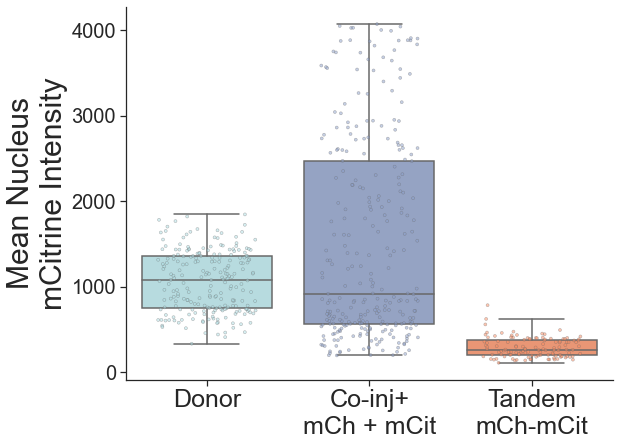

In [28]:
# plot mean intensity of individual nuclei across conditions

#make palette
palette = {"mcherry-mcitrine":"#fc8d62",
           "mcherry+mcitrine":"#8da0cb",
           "mcitrine":"powderblue"}

#font for graph
sns.set(font="Arial",style="ticks")

#order of conditions to plot
order =["mcitrine","mcherry+mcitrine","mcherry-mcitrine"]

#bar and scatterplots
ax=sns.catplot(data=dfint,x="condition",y="mean_intensity_per_nucleus", order=order, kind="box", showfliers=False, legend=False, height = 6, aspect = 1.3, palette=palette)
ax=sns.stripplot(data=dfint,x="condition",y="mean_intensity_per_nucleus", order=order, marker="o", alpha=0.5, jitter = 0.3, dodge = True , size = 3, linewidth=0.5, palette=palette)

#set x and y axis labels
ax.set_ylabel("Mean Nucleus\nmCitrine Intensity",fontsize=30)
ax.set_xlabel("")

#set y axis tick intervals and font size
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.yticks(fontsize=20)

# set x axis tick labels
ax.set_xticklabels(["Donor", "Co-inj+\nmCh + mCit","Tandem\nmCh-mCit"], fontsize = 25)

#save plot

plt.savefig("d1_int-FRET_mean_mcit_int.png",dpi=300, bbox_inches='tight')

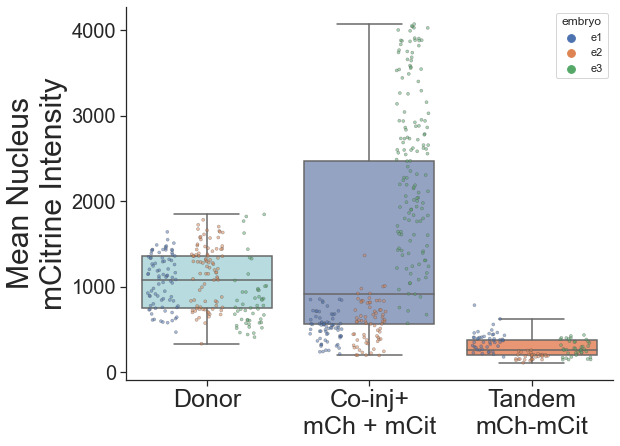

In [30]:
# plot mean intensity of individual nuclei across conditions

#make palette
palette = {"mcherry-mcitrine":"#fc8d62",
           "mcherry+mcitrine":"#8da0cb",
           "mcitrine":"powderblue"}

#font for graph
sns.set(font="Arial",style="ticks")

#order of conditions to plot
order =["mcitrine","mcherry+mcitrine","mcherry-mcitrine"]

#bar and scatterplots
ax=sns.catplot(data=dfint,x="condition",y="mean_intensity_per_nucleus", order=order, kind="box", showfliers=False, legend=False, height = 6, aspect = 1.3, palette=palette)
ax=sns.stripplot(data=dfint,x="condition",y="mean_intensity_per_nucleus", order=order, hue="embryo", marker="o", alpha=0.5, jitter = 0.3, dodge = True , size = 3, linewidth=0.5)

#set x and y axis labels
ax.set_ylabel("Mean Nucleus\nmCitrine Intensity",fontsize=30)
ax.set_xlabel("")

#set y axis tick intervals and font size
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.yticks(fontsize=20)

# set x axis tick labels
ax.set_xticklabels(["Donor", "Co-inj+\nmCh + mCit","Tandem\nmCh-mCit"], fontsize = 25)

#save plot
os.chdir("C:/Users/s1611128/Documents/Julia/Nanog-Cit-mCh-Pou5f3 FRET-FLIM/WIM/final_wim_scripts")
plt.savefig("d1_int-FRET_mean_mcit_int_embryo_hue.png",dpi=300, bbox_inches='tight')

In [12]:
# mean nucleus intensity per condition
dfsorted["average_nucleus_intensity_per_condition"]=dfsorted.groupby(["condition"])["mean_intensity_per_nucleus"].transform("mean")
dfsorted[["condition","average_nucleus_intensity_per_condition"]].drop_duplicates()

,condition,average_nucleus_intensity_per_condition
0,mcherry+mcitrine,1686.690811
218,mcherry-mcitrine,294.927782
375,mcitrine,1128.748819


In [13]:
#FRET efficiency 
#mcherry+mcitrine
1-(1687/1129)

-0.4942426926483614

In [14]:
#FRET efficiency 
#mcherry-mcitrine
1-(294.9/1129)

0.7387953941541188